In [2]:
# Utilerias
from datetime import datetime
from sqlalchemy.sql import func
from sqlalchemy import create_engine
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy import MetaData, Table, Column, Integer, Numeric, String, DateTime, ForeignKey, create_engine, insert, select, cast, and_, or_, not_, update, delete

In [3]:
# Creación de la tablas
datis = MetaData()

departments = Table('departments', datis,
                    Column('dept_no', String(20), primary_key=True),
                    Column('dept_name', String(50))
                   )
employees = Table('employees', datis,
                  Column('emp_no', Integer(), primary_key=True),
                  Column('birth_date', String(20)),
                  Column('first_name', String(50), nullable=False),
                  Column('last_name', String(50), nullable=False),
                  Column('gender', String(1), nullable=False),
                  Column('hire_date', String(20))
                 )
dept_emp = Table('dept_emp', datis,
                 Column('emp_no', Integer(), ForeignKey('employees.emp_no')),
                 Column('dept_no', Integer(), ForeignKey('departments.dept_no')),
                 Column('from_date', String(20)),
                 Column('to_date', String(20))
                )
dept_manager = Table('dept_manager', datis,
                     Column('dept_no', String(20), ForeignKey('departments.dept_no')),
                     Column('emp_no', Integer(), ForeignKey('employees.emp_no')),
                     Column('from_date', String(20)),
                     Column('to_date', String(20))
                    )
salaries = Table('salaries', datis,
               Column('emp_no', Integer(), ForeignKey('employees.emp_no')),
               Column('salary', Integer()),
               Column('from_date', String(20)),
               Column('to_date', String(20))
              )
titles = Table('titles', datis,
               Column('emp_no', Integer(), ForeignKey('employees.emp_no')),
               Column('title', String(50)),
               Column('from_date', String(20)),
               Column('to_date', String(20))
              )

In [5]:
# uso del engine
engine = create_engine('sqlite:///:memory:')
connection = engine.connect()
datis.create_all(engine)

In [6]:
# liberias de pandas y matlab
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [10]:
# Importación de tablas
#Departments
df = pd.read_csv('Data/departments.csv')
df.to_sql('departments',engine,index=False,if_exists='append')

#Employees
df = pd.read_csv('Data/employees.csv')
df.to_sql('employees',engine,index=False,if_exists='append')

#Dept_emp
df = pd.read_csv('Data/dept_emp.csv')
df.to_sql('dept_emp',engine,index=False,if_exists='append')

#Dept_manager
df = pd.read_csv('Data/dept_manager.csv')
df.to_sql('dept_manager',engine,index=False,if_exists='append')

#Salaries
df = pd.read_csv('Data/salaries.csv')
df.to_sql('salaries',engine,index=False,if_exists='append')

#Titles
df = pd.read_csv('Data/titles.csv')
df.to_sql('titles',engine,index=False,if_exists='append')

In [14]:
# Integración de SQL a Dataframe y el merge de la base de datos

salaries = pd.DataFrame(pd.read_sql("SELECT * FROM salaries", engine))
titles = pd.DataFrame(pd.read_sql("SELECT * FROM titles", engine))
merged = pd.merge(salaries, titles, on="emp_no", how="inner")
merged.head()

,emp_no,salary,from_date_x,to_date_x,title,from_date_y,to_date_y
0,10001,60117,1986-06-26,1987-06-26,Senior Engineer,1986-06-26,9999-01-01
1,10002,65828,1996-08-03,1997-08-03,Staff,1996-08-03,9999-01-01
2,10003,40006,1995-12-03,1996-12-02,Senior Engineer,1995-12-03,9999-01-01
3,10004,40054,1986-12-01,1987-12-01,Engineer,1986-12-01,1995-12-01
4,10004,40054,1986-12-01,1987-12-01,Senior Engineer,1995-12-01,9999-01-01


In [15]:
#Agrupación por puesto
grouped = merged.groupby("title").mean()
grouped

,emp_no,salary
title,,
Assistant Engineer,251495.398533,48493.204786
Engineer,252943.159987,48539.781423
Manager,110780.833333,51531.041667
Senior Engineer,253034.375949,48506.751806
Senior Staff,253423.367183,58503.286614
Staff,253399.240672,58465.271904
Technique Leader,251708.951052,48580.505772


In [16]:
#ordena la tbala para graficar
titlexsalary_df = grouped.drop(columns = "emp_no")
titlexsalary_df.reset_index(level=0, inplace=True)
titlexsalary_df

,title,salary
0,Assistant Engineer,48493.204786
1,Engineer,48539.781423
2,Manager,51531.041667
3,Senior Engineer,48506.751806
4,Senior Staff,58503.286614
5,Staff,58465.271904
6,Technique Leader,48580.505772


Text(0.5, 1.0, 'Salario Promedio por Titulo')

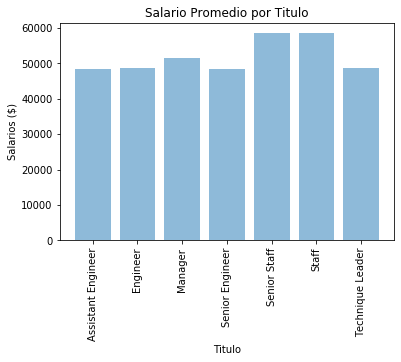

In [21]:
#Grafica
x_axis = titlexsalary_df['title']
ticks = np.arange(len(x_axis))
y_axis = titlexsalary_df['salary']
plt.bar(x_axis, y_axis, align="center", alpha=0.50)
plt.xticks(ticks, x_axis, rotation="vertical")
plt.ylabel("Salarios ($)")
plt.xlabel("Titulo")
plt.title("Salario Promedio por Titulo")